In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
wine_data=pd.read_csv(r"C:\Users\DELL\Downloads\WineQT.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
wine_data.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [6]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wine_data.duplicated().sum()

0

In [8]:
wine_data=wine_data.drop(columns='Id')

In [9]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


In [11]:
Filter=(wine_data['citric acid']>0.5)&(wine_data['fixed acidity']<7)
filtered_data=wine_data[Filter]
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1118,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1122,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


In [12]:
Filter1=(wine_data['quality']>=7)&(wine_data['alcohol']>10)
filtered_data1=wine_data[Filter1]
filtered_data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
89,8.0,0.59,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.50,7
143,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.30,7
145,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
146,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1096,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,7
1100,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1104,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1108,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


Get wines that have a quality rating of 7 or more and alcohol greater than 10.

Good-quality, stronger wines.

Alcohol content vs Quality

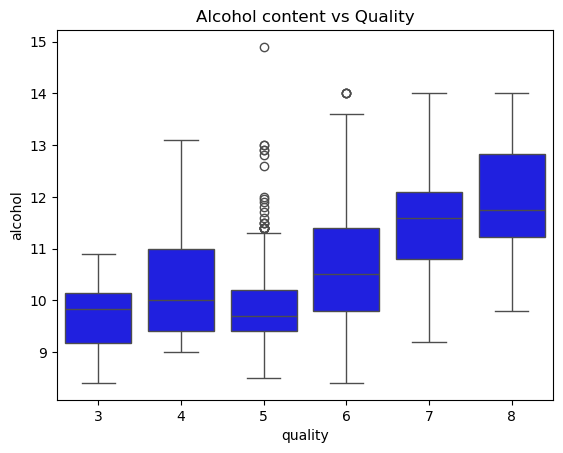

In [13]:
alcohol=wine_data['alcohol']
quality=wine_data['quality']
sns.boxplot(x=quality,y=alcohol,color='Blue')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Alcohol content vs Quality')
plt.show()

In [14]:
wine_data[(wine_data['alcohol']>8)&(wine_data['alcohol']<9)]['alcohol']

263     8.7
368     8.4
388     8.4
1023    8.5
1051    8.8
1053    8.8
Name: alcohol, dtype: float64

checking the outliers shown in the plot


In [15]:
Q1=wine_data['alcohol'].quantile(0.25)
Q3=wine_data['alcohol'].quantile(0.75)
IQR=Q3-Q1
outliers=wine_data[(wine_data['alcohol']<Q1-1.5*IQR)|(wine_data['alcohol']>Q3+1.5*IQR)]['alcohol']
outliers

96      14.000000
98      14.000000
329     14.000000
419     14.000000
462     14.900000
589     14.000000
787     13.600000
799     13.600000
868     13.600000
898     14.000000
1052    13.566667
1054    13.600000
Name: alcohol, dtype: float64

pH vs Quality

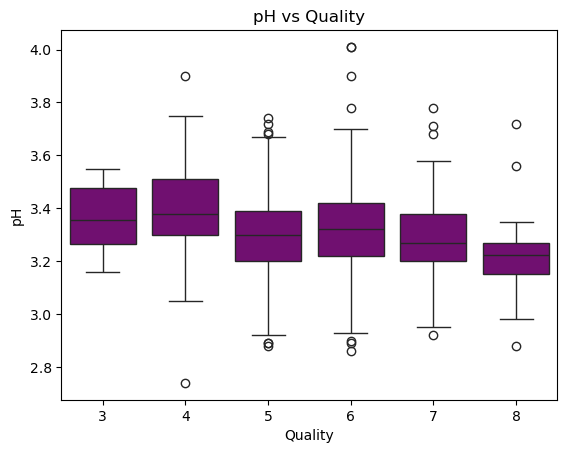

In [16]:
pH=wine_data['pH']
sns.boxplot(x=quality,y=pH,color='purple')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title("pH vs Quality")
plt.show()

In [17]:
Q1=wine_data['pH'].quantile(0.25)
Q3=wine_data['pH'].quantile(0.75)
IQR=Q3-Q1
outliers = wine_data[(wine_data["pH"] < Q1 - 1.5 * IQR ) | (wine_data["pH"] > Q3 + 1.5 * IQR)]["pH"]
outliers.sort_values(ascending=False)

935     4.01
933     4.01
32      3.90
493     3.90
923     3.78
785     3.78
66      3.75
396     3.74
1063    3.72
419     3.72
589     3.71
898     3.70
934     2.90
466     2.89
461     2.89
714     2.89
310     2.88
1047    2.88
388     2.86
103     2.74
Name: pH, dtype: float64

In [18]:
numeric_columns=wine_data.select_dtypes(include=[np.number]).columns

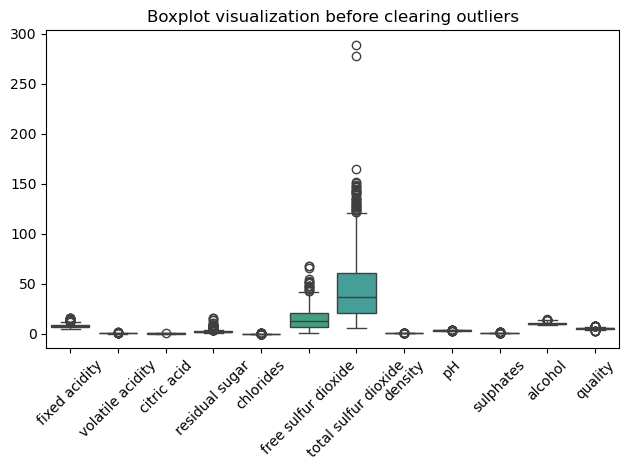

In [19]:
sns.boxplot(data=wine_data[numeric_columns])
plt.title("Boxplot visualization before clearing outliers" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
numeric_columns=wine_data.select_dtypes(include=[np.number]).columns.drop('quality')

In [21]:
def outliers_removal(data,cols):
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        data=data[(data[col]>=lower_bound)&(data[col]<=upper_bound)]
        return data
cleaned_data=outliers_removal(wine_data.copy(),numeric_columns)

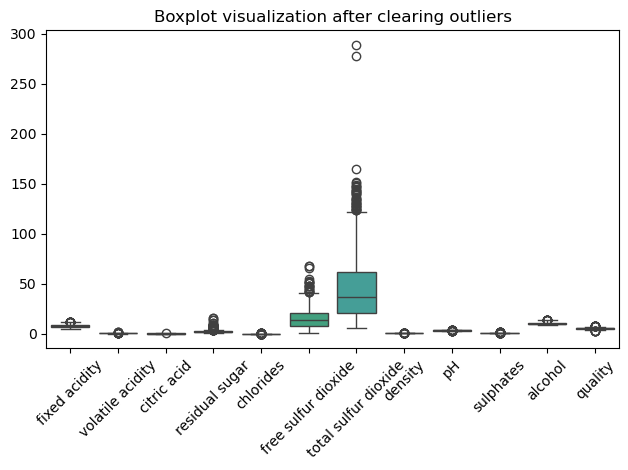

In [22]:
sns.boxplot(data=cleaned_data)
plt.title("Boxplot visualization after clearing outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


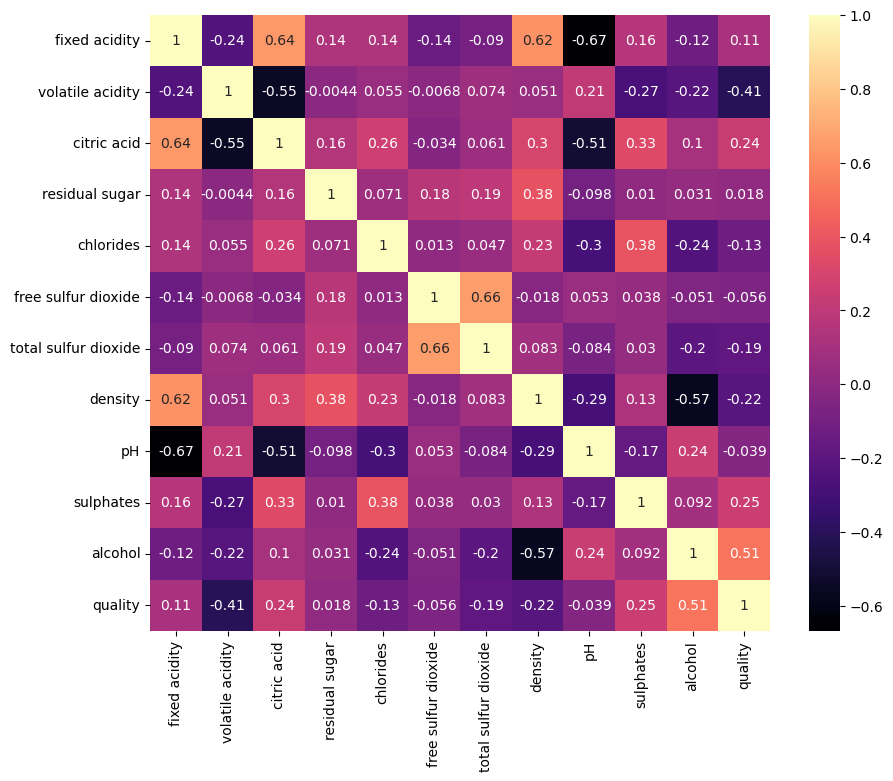

In [24]:
plt.figure(figsize=(10,8))
corr=cleaned_data.corr()
sns.heatmap(corr,annot=True,cmap='magma')
plt.show()

In [25]:
X=cleaned_data.drop('quality',axis=1)
y=cleaned_data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1099, 11)
(879, 11)
(220, 11)
(1099,)
(879,)
(220,)


In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred=model.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy 88.63636363636364


<Axes: >

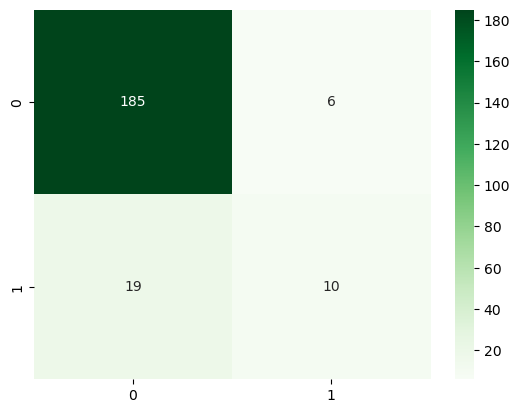

In [30]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap="Greens")

In [31]:
print(metrics.confusion_matrix(y_test , y_pred))

[[185   6]
 [ 19  10]]


In [32]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       191
           1       0.62      0.34      0.44        29

    accuracy                           0.89       220
   macro avg       0.77      0.66      0.69       220
weighted avg       0.87      0.89      0.87       220



In [33]:
manual_data = np.array([[7.2, 0.29, 0.40, 2.1, 0.045, 32.0, 100.0, 0.9942, 3.28, 0.75, 12.9]])
prediction=model.predict(manual_data)
print('Predicted Quality:',"high" if prediction[0]==1 else'Low')

Predicted Quality: high
